In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushrooms-images-classification-215/mushrooms.txt
/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/11.png
/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/4.png
/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/9.png
/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/14.png
/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/1.png
/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/2.png
/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/10.png
/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/12.png
/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/7.png
/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/5.png
/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/3.png
/kaggle/input/mushrooms-images-classification-215/data/data/elf

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
image_gen = ImageDataGenerator(rotation_range=0,
                              width_shift_range=0.1,
                              height_shift_range=0.1,rescale=1/255,shear_range=0.2,
                              zoom_range=0.2,horizontal_flip=False,fill_mode='nearest',
                              validation_split=.2)

In [4]:
path = "/kaggle/input/mushrooms-images-classification-215/data/data/elfin_saddle/11.png"

In [5]:
def display_img(path):
    plt.figure(figsize=(2,2))
    read = cv2.imread(path)
    
    print(read.shape)
    
    read_cvt = cv2.cvtColor(read ,cv2.COLOR_BGR2RGB)
    plt.imshow(read_cvt)
    plt.show()

(512, 512, 3)


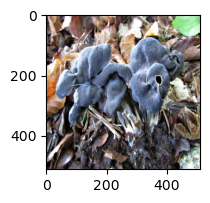

In [6]:
display_img(path)

In [7]:
train_dataset = image_gen.flow_from_directory(batch_size=32,
                                                 directory='/kaggle/input/mushrooms-images-classification-215/data/data/',
                                                 shuffle=True,
                                                 target_size=(180, 180), 
                                                 subset="training",
                                                 class_mode='categorical')

Found 2508 images belonging to 215 classes.


In [8]:
validation_dataset = image_gen.flow_from_directory(batch_size=32,
                                                 directory='/kaggle/input/mushrooms-images-classification-215/data/data/',
                                                 shuffle=True,
                                                 target_size=(180, 180), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 614 images belonging to 215 classes.


In [9]:
len(train_dataset)

79

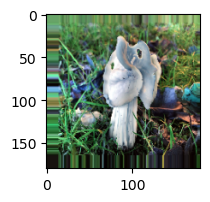

In [10]:
plt.figure(figsize=(2,2))
read = train_dataset[4][0][0]
read_cvt = cv2.cvtColor(read ,cv2.COLOR_BGR2RGB)
plt.imshow(read_cvt)
plt.show()

In [11]:
len(train_dataset), len(train_dataset[0]), len(train_dataset[0][0]), len(train_dataset[0][0][0]), len(train_dataset[0][0][0][0]), len(train_dataset[0][0][0][0][0]) 

(79, 2, 32, 180, 180, 3)

In [12]:
from keras import Sequential, layers
from keras.optimizers import Adam

In [13]:
model = Sequential()

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(180, 180, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(1024, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(215, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 178, 178, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 87, 87, 128)      512       
 hNormalization)                                                 
                                                        

In [14]:
steps_per_epoch = 2508//32
validation_steps = 614//32

history = model.fit_generator(generator=train_dataset,
                              steps_per_epoch=steps_per_epoch,
                              epochs=100,
                              validation_data=validation_dataset,
                              validation_steps=validation_steps)

/tmp/ipykernel_23/3493561866.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_dataset,


Epoch 1/100
78/78 [==============================] - 108s 1s/step - loss: 6.1426 - accuracy: 0.0129 - val_loss: 9.5277 - val_accuracy: 0.0016
Epoch 2/100
78/78 [==============================] - 68s 874ms/step - loss: 5.4002 - accuracy: 0.0315 - val_loss: 9.4325 - val_accuracy: 0.0049
Epoch 3/100
78/78 [==============================] - 75s 968ms/step - loss: 5.0063 - accuracy: 0.0545 - val_loss: 9.3602 - val_accuracy: 0.0049
Epoch 4/100
78/78 [==============================] - 75s 957ms/step - loss: 4.6624 - accuracy: 0.0824 - val_loss: 8.2980 - val_accuracy: 0.0049
Epoch 5/100
78/78 [==============================] - 75s 967ms/step - loss: 4.3849 - accuracy: 0.1042 - val_loss: 5.9748 - val_accuracy: 0.0164
Epoch 6/100
78/78 [==============================] - 75s 964ms/step - loss: 4.1825 - accuracy: 0.1070 - val_loss: 5.1336 - val_accuracy: 0.0674
Epoch 7/100
78/78 [==============================] - 75s 963ms/step - loss: 3.8827 - accuracy: 0.1551 - val_loss: 3.9655 - val_accuracy: 0